In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import catboost

newparams = {'figure.figsize': (12, 8), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}

plt.rcParams.update(newparams)

In [2]:
data_path="../data/"

folders = ["A", "B", "C"]


dataframes = {f : {} for f in folders}
for folder in folders:
    for file in os.listdir(data_path + folder + "/"):
        filename=file.split(".")[0]
        dataframes[folder][filename]=pd.read_parquet(data_path + folder + "/"+ file)


In [3]:
dataframes["A"].keys()

dict_keys(['X_train_estimated', 'train_targets', 'X_train_observed', 'X_test_estimated'])

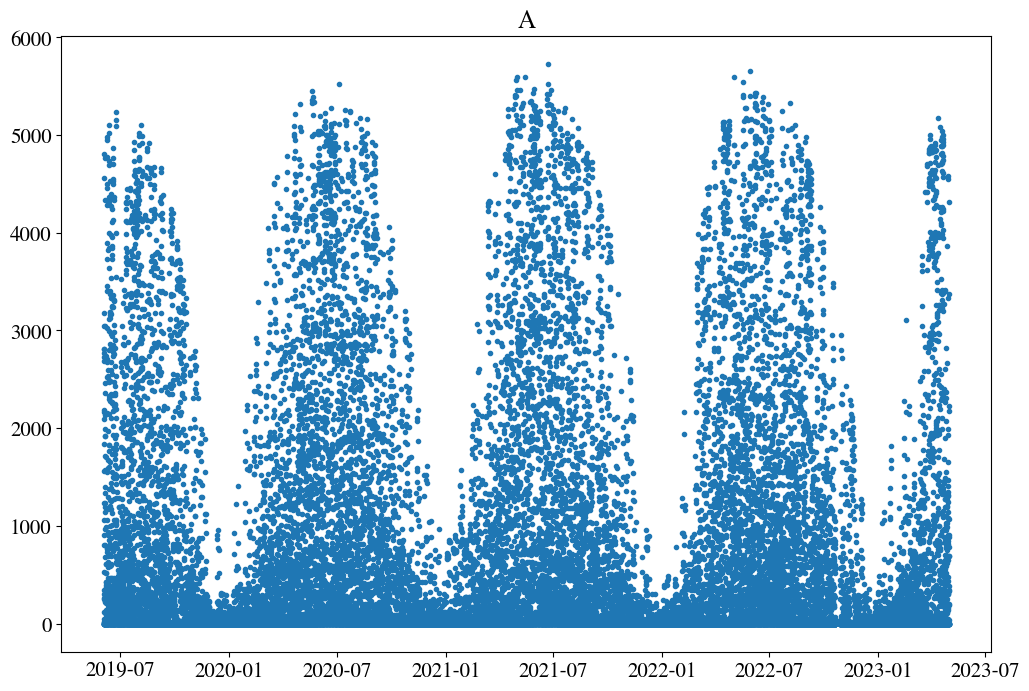

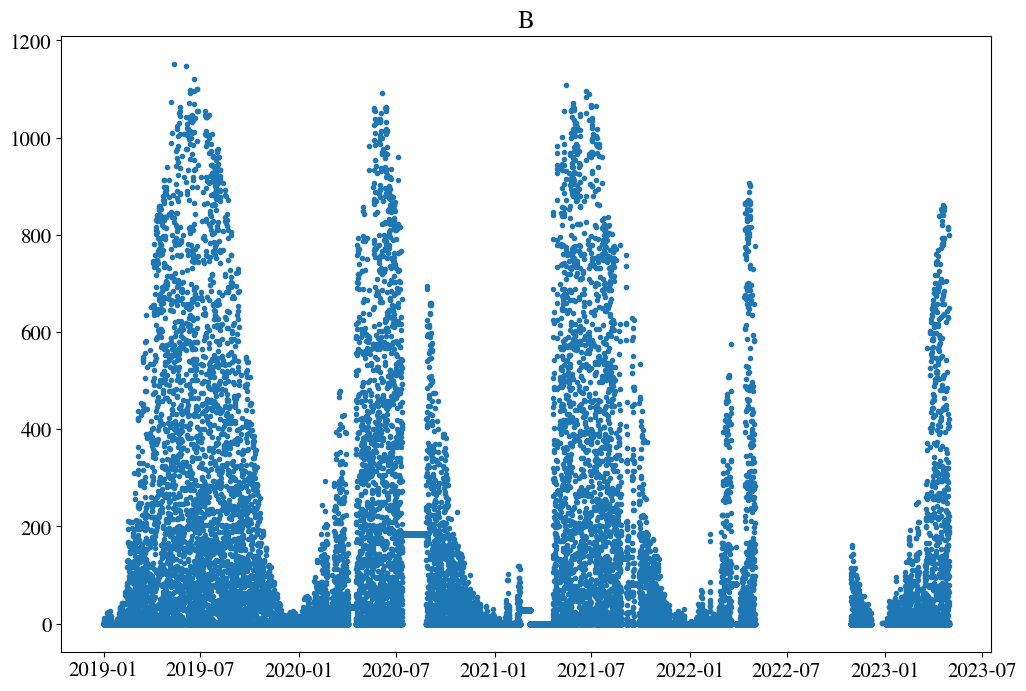

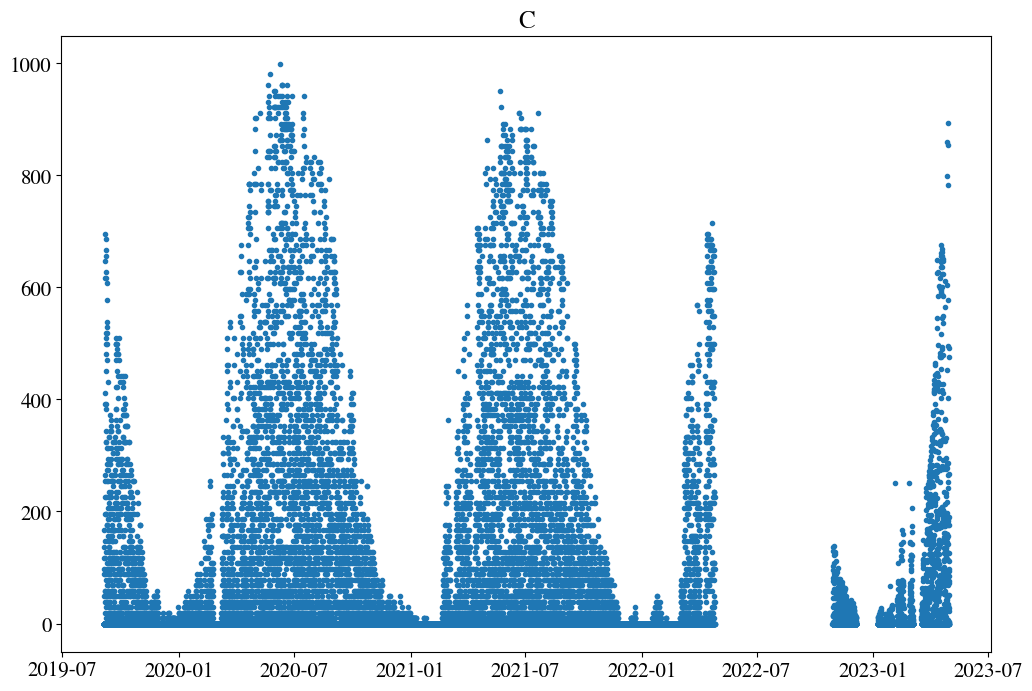

In [4]:
for site in folders:
    df_Y = dataframes[site]["train_targets"]
    # print(df_Y.columns)
    plt.title(site)
    plt.plot(df_Y["time"], df_Y["pv_measurement"], ".")
    plt.show()

In [6]:
os.listdir("data/A")

FileNotFoundError: [Errno 2] No such file or directory: 'data/A'

In [8]:
path="../data/B"

In [7]:
X_train_obsereved = pd.read_parquet(path + "/X_train_observed.parquet")
X_train_estimated = pd.read_parquet(path + "/X_train_estimated.parquet")
Y_train_targets = pd.read_parquet(path + "/train_targets.parquet")
X_test_estimated = pd.read_parquet(path + "/X_test_estimated.parquet")

NameError: name 'path' is not defined

In [10]:
X_train_estimated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17576 entries, 0 to 17575
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date_calc                       17576 non-null  datetime64[us]
 1   date_forecast                   17576 non-null  datetime64[us]
 2   absolute_humidity_2m:gm3        17576 non-null  float32       
 3   air_density_2m:kgm3             17576 non-null  float32       
 4   ceiling_height_agl:m            13887 non-null  float32       
 5   clear_sky_energy_1h:J           17576 non-null  float32       
 6   clear_sky_rad:W                 17576 non-null  float32       
 7   cloud_base_agl:m                15613 non-null  float32       
 8   dew_or_rime:idx                 17576 non-null  float32       
 9   dew_point_2m:K                  17576 non-null  float32       
 10  diffuse_rad:W                   17576 non-null  float32       
 11  di

In [6]:
X_test_estimated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date_calc                       2880 non-null   datetime64[us]
 1   date_forecast                   2880 non-null   datetime64[us]
 2   absolute_humidity_2m:gm3        2880 non-null   float32       
 3   air_density_2m:kgm3             2880 non-null   float32       
 4   ceiling_height_agl:m            2087 non-null   float32       
 5   clear_sky_energy_1h:J           2880 non-null   float32       
 6   clear_sky_rad:W                 2880 non-null   float32       
 7   cloud_base_agl:m                2582 non-null   float32       
 8   dew_or_rime:idx                 2880 non-null   float32       
 9   dew_point_2m:K                  2880 non-null   float32       
 10  diffuse_rad:W                   2880 non-null   float32       
 11  diff

In [7]:
X_train_obsereved.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118669 entries, 0 to 118668
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date_forecast                   118669 non-null  datetime64[us]
 1   absolute_humidity_2m:gm3        118669 non-null  float32       
 2   air_density_2m:kgm3             118669 non-null  float32       
 3   ceiling_height_agl:m            96422 non-null   float32       
 4   clear_sky_energy_1h:J           118669 non-null  float32       
 5   clear_sky_rad:W                 118669 non-null  float32       
 6   cloud_base_agl:m                110603 non-null  float32       
 7   dew_or_rime:idx                 118669 non-null  float32       
 8   dew_point_2m:K                  118669 non-null  float32       
 9   diffuse_rad:W                   118669 non-null  float32       
 10  diffuse_rad_1h:J                118669 non-null  float32

In [11]:
Y_train_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32848 entries, 0 to 32847
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time            32848 non-null  datetime64[us]
 1   pv_measurement  32844 non-null  float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 513.4 KB


In [9]:
Y_train_targets.head(15)

,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
5,2019-06-03 03:00:00,251.02
6,2019-06-03 04:00:00,263.78
7,2019-06-03 05:00:00,522.72
8,2019-06-03 06:00:00,904.42
9,2019-06-03 07:00:00,1238.82


In [10]:
X_train_obsereved.head(15)

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,...,342.834015,-3.202,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,...,346.294006,-3.650,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,...,349.768005,-3.998,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,...,353.251007,-4.247,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,...,356.742004,-4.393,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
5,2019-06-02 23:15:00,7.7,1.224,1694.199951,0.0,0.0,1694.199951,0.0,280.299988,0.0,...,0.235000,-4.438,0.0,286.899994,100.0,36427.199219,3.4,-3.4,0.2,-0.0
6,2019-06-02 23:30:00,7.7,1.223,1685.099976,0.0,0.0,1685.099976,0.0,280.299988,0.0,...,3.728000,-4.379,0.0,286.899994,100.0,31136.000000,3.3,-3.3,0.4,-0.0
7,2019-06-02 23:45:00,7.7,1.222,1676.400024,0.0,0.0,1676.400024,0.0,280.299988,0.0,...,7.218000,-4.219,0.0,287.000000,100.0,25819.500000,3.2,-3.2,0.5,-0.0
8,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.0,0.0,1668.099976,0.0,280.200012,0.0,...,9.741000,-3.910,0.0,287.000000,100.0,20473.000000,3.2,-3.1,0.7,-0.0
9,2019-06-03 00:15:00,7.8,1.220,1598.199951,0.0,0.0,1598.199951,0.0,280.500000,0.0,...,13.212000,-3.575,0.0,287.000000,100.0,15892.000000,3.1,-3.0,0.7,-0.0


In [11]:
X_train_obsereved.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [12]:
X_train_estimated.head(3)

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,...,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0


In [13]:
X_train_estimated.head(3)

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2022-10-27 07:00:18,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.0,0.0,1211.699951,1.0,281.399994,...,340.799011,-38.466999,0.0,284.700012,100.0,29429.699219,0.8,-0.4,0.7,-0.0
1,2022-10-27 07:00:18,2022-10-28 22:15:00,8.4,1.233,2085.899902,0.0,0.0,1560.500000,1.0,281.299988,...,345.451996,-38.955002,0.0,284.700012,100.0,23604.099609,0.7,-0.4,0.7,-0.0
2,2022-10-27 07:00:18,2022-10-28 22:30:00,8.3,1.233,2746.600098,0.0,0.0,1909.400024,1.0,281.200012,...,350.153015,-39.310001,0.0,284.700012,100.0,17799.800781,0.7,-0.3,0.6,-0.0


In [14]:
# for col in X_train_estimated.columns:
#     if "date" not in col:
#         plt.title(col)
#         plt.plot(X_test_estimated[col])
#         plt.show()

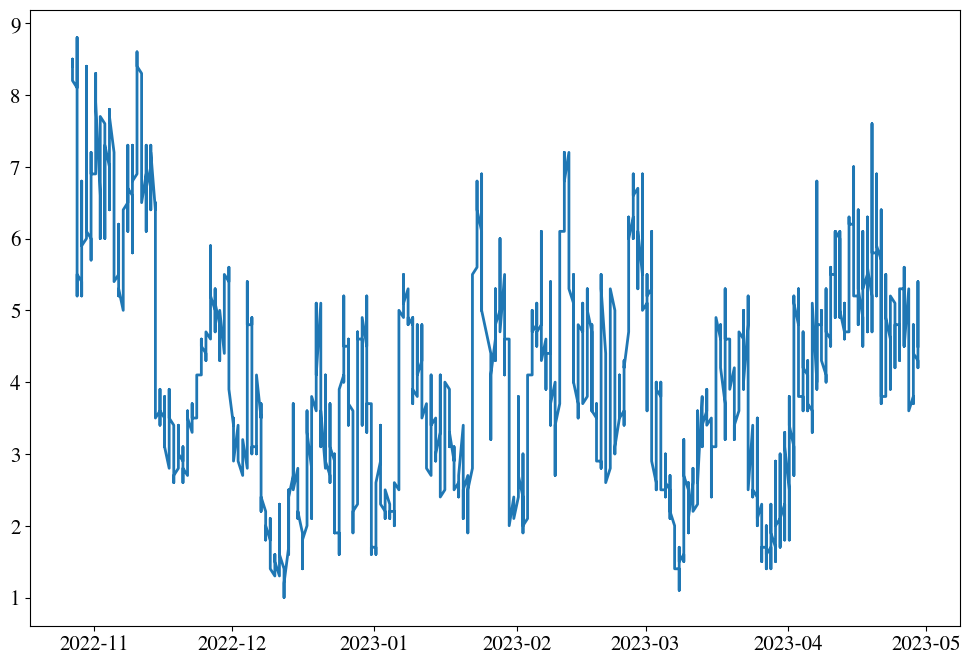

In [12]:
plt.plot(X_train_estimated["date_calc"], X_train_estimated["absolute_humidity_2m:gm3"])

In [13]:
Y_train_targets

,time,pv_measurement
0,2018-12-31 23:00:00,0.000000
1,2019-01-01 00:00:00,0.000000
2,2019-01-01 01:00:00,0.000000
3,2019-01-01 02:00:00,0.000000
4,2019-01-01 03:00:00,0.000000
...,...,...
32843,2023-04-30 19:00:00,0.828587
32844,2023-04-30 20:00:00,-0.000000
32845,2023-04-30 21:00:00,-0.000000
32846,2023-04-30 22:00:00,-0.000000


In [14]:
X_train_obsereved

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-01-01 00:00:00,5.6,1.239,1226.400024,0.0,0.0,1226.400024,0.0,275.399994,0.0,...,12.985000,-49.139999,0.0,278.399994,73.900002,19275.900391,2.5,1.1,2.2,-0.0
1,2019-01-01 00:15:00,5.6,1.239,1209.300049,0.0,0.0,1209.300049,0.0,275.200012,0.0,...,18.205999,-48.688000,0.0,278.299988,83.800003,17638.000000,2.7,1.2,2.4,-0.0
2,2019-01-01 00:30:00,5.5,1.240,1192.099976,0.0,0.0,1192.099976,0.0,275.100006,0.0,...,23.339001,-48.091000,0.0,278.200012,91.199997,16008.799805,2.9,1.2,2.7,-0.0
3,2019-01-01 00:45:00,5.4,1.241,1174.900024,0.0,0.0,1174.900024,0.0,274.899994,0.0,...,28.367001,-47.358002,0.0,278.100006,96.400002,14388.500000,3.1,1.2,2.9,-0.0
4,2019-01-01 01:00:00,5.4,1.241,1157.599976,0.0,0.0,1157.599976,0.0,274.700012,0.0,...,33.275002,-46.497002,0.0,278.000000,99.400002,12777.299805,3.4,1.3,3.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116924,2022-05-02 23:00:00,4.3,1.282,NaN,0.0,0.0,691.599976,0.0,271.500000,0.0,...,356.487000,-11.198000,0.0,274.399994,46.900002,20778.300781,4.4,3.9,-2.0,0.0
116925,2022-05-02 23:15:00,4.3,1.282,NaN,0.0,0.0,689.000000,0.0,271.500000,0.0,...,0.184000,-11.247000,0.0,274.399994,48.200001,20153.599609,4.5,4.0,-2.0,0.0
116926,2022-05-02 23:30:00,4.3,1.282,NaN,0.0,0.0,686.400024,0.0,271.500000,0.0,...,3.881000,-11.187000,0.0,274.299988,49.599998,19528.699219,4.5,4.1,-2.0,0.0
116927,2022-05-02 23:45:00,4.2,1.283,NaN,0.0,0.0,683.799988,0.0,271.399994,0.0,...,7.573000,-11.019000,0.0,274.200012,51.000000,18903.699219,4.6,4.1,-2.0,0.0


In [18]:
X_train_obsereved

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,...,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,...,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,...,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,...,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,...,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,...,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,...,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,...,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,...,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


In [15]:
df = pd.merge_asof(Y_train_targets, X_train_obsereved, left_on="time", right_on="date_forecast")
df=df[(df["time"] == df["date_forecast"])]
df

,time,pv_measurement,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
1,2019-01-01 00:00:00,0.0,2019-01-01 00:00:00,5.6,1.239,1226.400024,0.000000,0.000000,1226.400024,0.0,...,12.985000,-49.139999,0.0,278.399994,73.900002,19275.900391,2.5,1.1,2.2,-0.0
2,2019-01-01 01:00:00,0.0,2019-01-01 01:00:00,5.4,1.241,1157.599976,0.000000,0.000000,1157.599976,0.0,...,33.275002,-46.497002,0.0,278.000000,99.400002,12777.299805,3.4,1.3,3.1,-0.0
3,2019-01-01 02:00:00,0.0,2019-01-01 02:00:00,5.5,1.238,1087.599976,0.000000,0.000000,1087.599976,0.0,...,51.573002,-41.963001,0.0,278.200012,98.400002,12776.700195,3.8,2.0,3.3,-0.0
4,2019-01-01 03:00:00,0.0,2019-01-01 03:00:00,5.3,1.240,1016.400024,0.000000,0.000000,1016.400024,0.0,...,67.794998,-36.167000,0.2,277.799988,97.800003,8399.900391,4.3,2.4,3.6,-0.0
5,2019-01-01 04:00:00,0.0,2019-01-01 04:00:00,5.5,1.239,1029.000000,0.000000,0.000000,1029.000000,0.0,...,82.383003,-29.681999,0.2,277.200012,97.599998,4102.799805,5.9,5.0,3.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29218,2022-05-02 19:00:00,0.0,2022-05-02 19:00:00,4.7,1.270,3359.699951,186523.906250,18.700001,709.700012,0.0,...,300.023010,2.603000,0.0,276.100006,73.800003,15968.500000,6.2,5.3,-3.3,0.0
29219,2022-05-02 20:00:00,0.0,2022-05-02 20:00:00,4.7,1.274,NaN,15813.799805,0.000000,599.599976,0.0,...,313.497986,-2.775000,0.0,275.500000,39.599998,19161.400391,6.1,5.1,-3.3,0.0
29220,2022-05-02 21:00:00,0.0,2022-05-02 21:00:00,4.4,1.277,NaN,0.000000,0.000000,1399.199951,0.0,...,327.411987,-7.051000,0.0,275.100006,33.299999,22569.699219,5.7,4.7,-3.3,0.0
29221,2022-05-02 22:00:00,NaN,2022-05-02 22:00:00,4.3,1.280,NaN,0.000000,0.000000,696.000000,0.0,...,341.786987,-9.932000,0.0,274.799988,38.299999,20897.500000,5.1,4.3,-2.7,0.0


In [34]:
df

,time,pv_measurement,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,0.00,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.000000,0.0,1744.900024,0.0,...,342.834015,-3.202000,0.0,285.899994,100.000000,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 23:00:00,0.00,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.000000,0.0,1703.599976,0.0,...,356.742004,-4.393000,0.0,286.799988,100.000000,41699.898438,3.5,-3.5,0.0,-0.0
2,2019-06-03 00:00:00,0.00,2019-06-03 00:00:00,7.7,1.221,1668.099976,0.000000,0.0,1668.099976,0.0,...,9.741000,-3.910000,0.0,287.000000,100.000000,20473.000000,3.2,-3.1,0.7,-0.0
3,2019-06-03 01:00:00,0.00,2019-06-03 01:00:00,8.2,1.218,1388.400024,0.000000,0.0,1388.400024,0.0,...,23.541000,-1.986000,0.0,286.899994,100.000000,2104.600098,2.8,-2.7,0.8,-0.0
4,2019-06-03 02:00:00,19.36,2019-06-03 02:00:00,8.8,1.219,1108.500000,6546.899902,9.8,1108.500000,0.0,...,37.040001,1.401000,0.0,286.500000,100.000000,2681.600098,2.7,-2.5,1.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29662,2022-10-20 20:00:00,0.00,2022-10-20 20:00:00,5.9,1.279,1291.500000,0.000000,0.0,1302.500000,0.0,...,307.263000,-27.830000,0.0,278.399994,59.400002,41022.398438,2.0,0.6,1.9,-0.0
29663,2022-10-20 21:00:00,0.00,2022-10-20 21:00:00,5.7,1.283,NaN,0.000000,0.0,1009.299988,0.0,...,323.514008,-32.546001,0.0,278.000000,23.799999,38581.898438,1.8,0.3,1.8,-0.0
29664,2022-10-20 22:00:00,0.00,2022-10-20 22:00:00,5.4,1.286,NaN,0.000000,0.0,149.500000,0.0,...,341.010986,-35.674000,0.0,277.600006,12.200000,39697.699219,1.5,0.1,1.5,-0.0
29665,2022-10-20 23:00:00,0.00,2022-10-20 23:00:00,5.3,1.289,NaN,0.000000,0.0,NaN,0.0,...,359.334991,-36.821999,0.0,277.299988,5.500000,28090.099609,1.3,-0.0,1.3,-0.0


In [57]:
X_train_obsereved.columns

Index(['date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms',

In [17]:
X_cols=[]
for col in X_train_obsereved.columns:
    if "date" not in col:
        X_cols.append(col)

In [46]:
min(X_train_estimated["date_forecast"])

Timestamp('2022-10-28 22:00:00')

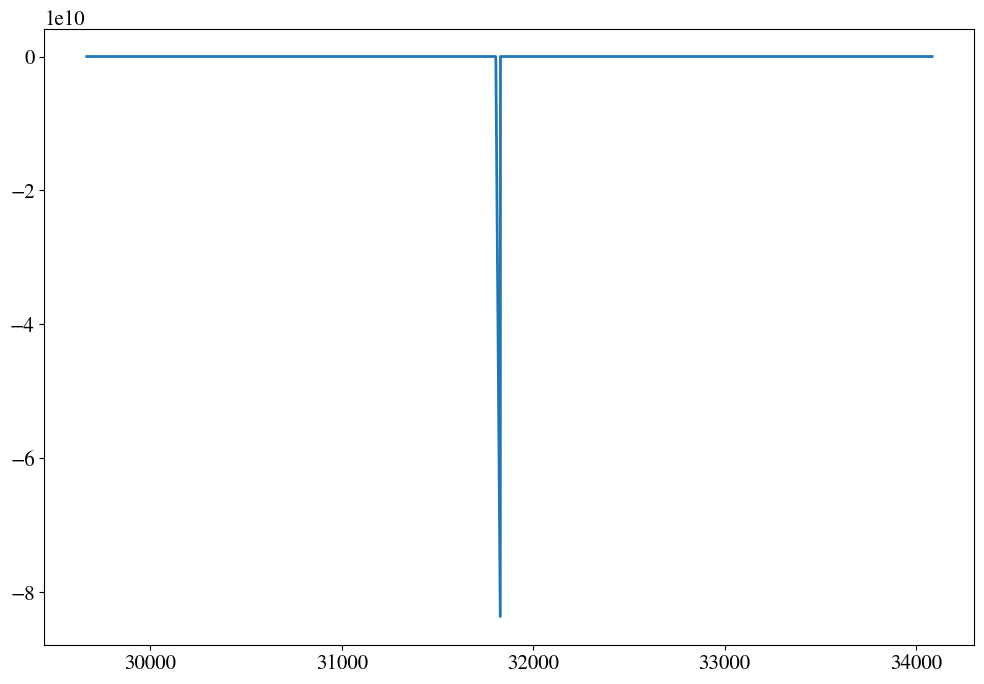

In [49]:
df_test = pd.merge_asof(Y_train_targets, X_train_estimated, left_on="time", right_on="date_forecast")
df_test = df_test[df_test["date_forecast"] > min(X_train_estimated["date_forecast"])]
plt.plot(df_test["date_forecast"]-df_test["time"])

In [50]:
df_test

,time,pv_measurement,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
29668,2022-10-28 23:00:00,0.00,2022-10-27 07:00:18,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.000000,0.0,2607.000000,...,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
29669,2022-10-29 00:00:00,0.00,2022-10-28 07:00:05,2022-10-29 00:00:00,8.2,1.230,1978.000000,0.000000,0.0,1660.500000,...,17.361000,-39.013000,0.1,283.700012,100.000000,3041.600098,1.5,1.2,0.8,-0.0
29670,2022-10-29 01:00:00,0.00,2022-10-28 07:00:05,2022-10-29 01:00:00,8.1,1.229,1722.000000,0.000000,0.0,1699.300049,...,35.452000,-36.023998,0.3,284.200012,100.000000,3572.600098,1.5,0.8,1.2,-0.0
29671,2022-10-29 02:00:00,0.00,2022-10-28 07:00:05,2022-10-29 02:00:00,8.3,1.228,1456.400024,0.000000,0.0,1294.699951,...,52.154999,-31.374001,0.2,284.600006,100.000000,2699.199951,1.8,1.3,1.2,-0.0
29672,2022-10-29 03:00:00,0.00,2022-10-28 07:00:05,2022-10-29 03:00:00,8.4,1.225,1098.699951,0.000000,0.0,652.200012,...,67.456001,-25.572001,0.4,284.500000,100.000000,2242.100098,2.9,2.7,1.1,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,2023-04-30 19:00:00,9.02,2023-04-29 07:00:05,2023-04-30 19:00:00,4.6,1.275,1633.000000,157319.796875,13.5,547.500000,...,299.898987,1.913000,0.0,275.200012,98.800003,25598.000000,5.4,5.1,1.8,-0.0
34081,2023-04-30 20:00:00,0.00,2023-04-29 07:00:05,2023-04-30 20:00:00,4.5,1.279,1742.900024,8133.899902,0.0,534.700012,...,313.423004,-3.473000,0.0,274.700012,94.599998,19760.900391,4.7,4.2,2.1,-0.0
34082,2023-04-30 21:00:00,0.00,2023-04-29 07:00:05,2023-04-30 21:00:00,4.5,1.281,1794.900024,0.000000,0.0,565.900024,...,327.399994,-7.752000,0.0,274.600006,94.599998,23291.400391,4.5,3.7,2.6,-0.0
34083,2023-04-30 22:00:00,0.00,2023-04-29 07:00:05,2023-04-30 22:00:00,4.5,1.281,1532.900024,0.000000,0.0,519.000000,...,341.851013,-10.630000,0.1,274.399994,97.400002,16674.900391,4.3,3.4,2.6,-0.0


In [18]:
Y_col = "pv_measurement"
X_train = df[X_cols]
Y_train = df[Y_col]

X_test = df_test[X_cols]
Y_test = df_test[Y_col]

NameError: name 'df_test' is not defined

In [72]:
model = catboost.CatBoostRegressor(learning_rate=0.01, iterations=10000)

In [73]:
model.fit(df[X_cols], df["pv_measurement"])

0:	learn: 1185.9866953	total: 12.4ms	remaining: 2m 3s
1:	learn: 1176.9918863	total: 31.2ms	remaining: 2m 35s
2:	learn: 1168.0236615	total: 47.8ms	remaining: 2m 39s
3:	learn: 1159.3401856	total: 73.6ms	remaining: 3m 3s
4:	learn: 1150.4992105	total: 82.6ms	remaining: 2m 45s
5:	learn: 1141.6278092	total: 101ms	remaining: 2m 48s
6:	learn: 1132.8345859	total: 107ms	remaining: 2m 32s
7:	learn: 1124.2983334	total: 113ms	remaining: 2m 21s
8:	learn: 1115.6863956	total: 121ms	remaining: 2m 14s
9:	learn: 1107.2167617	total: 129ms	remaining: 2m 9s
10:	learn: 1098.8799856	total: 137ms	remaining: 2m 4s
11:	learn: 1090.4988678	total: 144ms	remaining: 1m 59s
12:	learn: 1082.3325342	total: 153ms	remaining: 1m 57s
13:	learn: 1074.4905624	total: 170ms	remaining: 2m 1s
14:	learn: 1066.7051652	total: 177ms	remaining: 1m 57s
15:	learn: 1058.8138277	total: 183ms	remaining: 1m 53s
16:	learn: 1051.1491892	total: 195ms	remaining: 1m 54s
17:	learn: 1043.4796642	total: 200ms	remaining: 1m 51s
18:	learn: 1036.0647

In [74]:
model.score(X_test, Y_test)

0.8634359772890168

In [75]:
for i, col in enumerate(X_cols):
    print(f"{col}\t\t{model.feature_importances_[i]}")

absolute_humidity_2m:gm3		1.472920136522216
air_density_2m:kgm3		1.7609582983971481
ceiling_height_agl:m		1.8671735776151632
clear_sky_energy_1h:J		2.1291208995339828
clear_sky_rad:W		6.19037614029247
cloud_base_agl:m		2.1865530949230023
dew_or_rime:idx		0.00032702396017158874
dew_point_2m:K		1.7554584887699873
diffuse_rad:W		6.898301641399817
diffuse_rad_1h:J		3.673062905485914
direct_rad:W		25.481358292326217
direct_rad_1h:J		5.570754872459948
effective_cloud_cover:p		2.1473683492529245
elevation:m		0.0
fresh_snow_12h:cm		0.012939166883718002
fresh_snow_1h:cm		3.212818497206588e-05
fresh_snow_24h:cm		0.3151864747810707
fresh_snow_3h:cm		4.0138220950566356e-05
fresh_snow_6h:cm		0.0026805894762353855
is_day:idx		0.23815347231851314
is_in_shadow:idx		0.0004794021328921899
msl_pressure:hPa		1.0960576207614916
precip_5min:mm		0.3060681664587454
precip_type_5min:idx		0.5131185611163428
pressure_100m:hPa		1.3949029519340732
pressure_50m:hPa		0.805444440866762
prob_rime:p		6.669758636230988e

In [76]:
y_test = model.predict(df_test[X_cols])

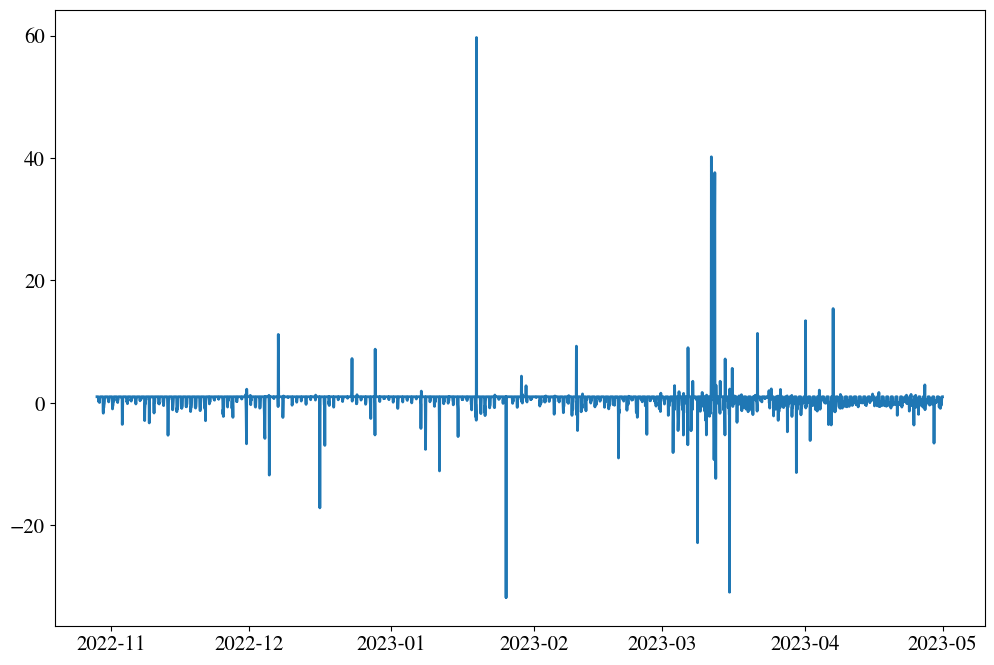

In [77]:
plt.plot(df_test["date_forecast"], (y_test - df_test["pv_measurement"]) / y_test)

In [ ]:
model.predict()

In [1]:
df

NameError: name 'df' is not defined